In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

In [110]:
df = pd.read_csv('PhishingDetectionData.csv')
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [111]:
df.shape

(10000, 18)

In [112]:
columnNames = df.columns

columnNames

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Have_IP,10000.0,0.0055,0.073961,0.0,0.0,0.0,0.0,1.0
Have_At,10000.0,0.0226,0.148632,0.0,0.0,0.0,0.0,1.0
URL_Length,10000.0,0.7734,0.418653,0.0,1.0,1.0,1.0,1.0
URL_Depth,10000.0,3.0720,2.128631,0.0,2.0,3.0,4.0,20.0
Redirection,10000.0,0.0135,0.115408,0.0,0.0,0.0,0.0,1.0
https_Domain,10000.0,0.0002,0.014141,0.0,0.0,0.0,0.0,1.0
TinyURL,10000.0,0.0903,0.286625,0.0,0.0,0.0,0.0,1.0
Prefix/Suffix,10000.0,0.0932,0.290727,0.0,0.0,0.0,0.0,1.0
DNS_Record,10000.0,0.1008,0.301079,0.0,0.0,0.0,0.0,1.0
Web_Traffic,10000.0,0.8457,0.361254,0.0,1.0,1.0,1.0,1.0


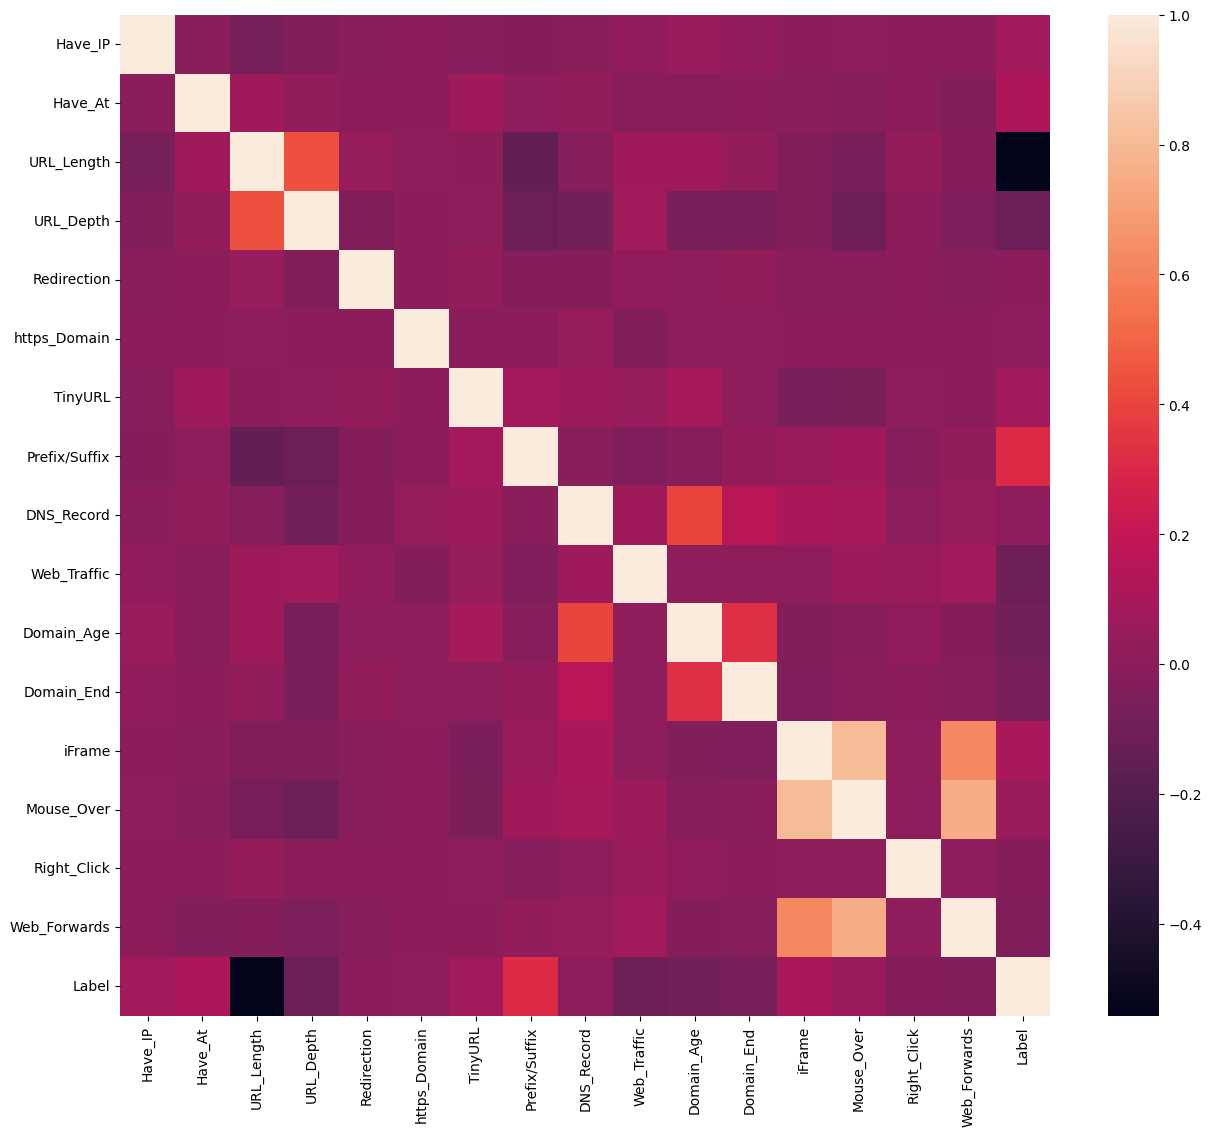

In [115]:
plt.figure(figsize=(15,13))
sns.heatmap(df.iloc[:, 1:].corr())
plt.show()

array([[<Axes: title={'center': 'Have_IP'}>,
        <Axes: title={'center': 'Have_At'}>,
        <Axes: title={'center': 'URL_Length'}>,
        <Axes: title={'center': 'URL_Depth'}>],
       [<Axes: title={'center': 'Redirection'}>,
        <Axes: title={'center': 'https_Domain'}>,
        <Axes: title={'center': 'TinyURL'}>,
        <Axes: title={'center': 'Prefix/Suffix'}>],
       [<Axes: title={'center': 'DNS_Record'}>,
        <Axes: title={'center': 'Web_Traffic'}>,
        <Axes: title={'center': 'Domain_Age'}>,
        <Axes: title={'center': 'Domain_End'}>],
       [<Axes: title={'center': 'iFrame'}>,
        <Axes: title={'center': 'Mouse_Over'}>,
        <Axes: title={'center': 'Right_Click'}>,
        <Axes: title={'center': 'Web_Forwards'}>],
       [<Axes: title={'center': 'Label'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

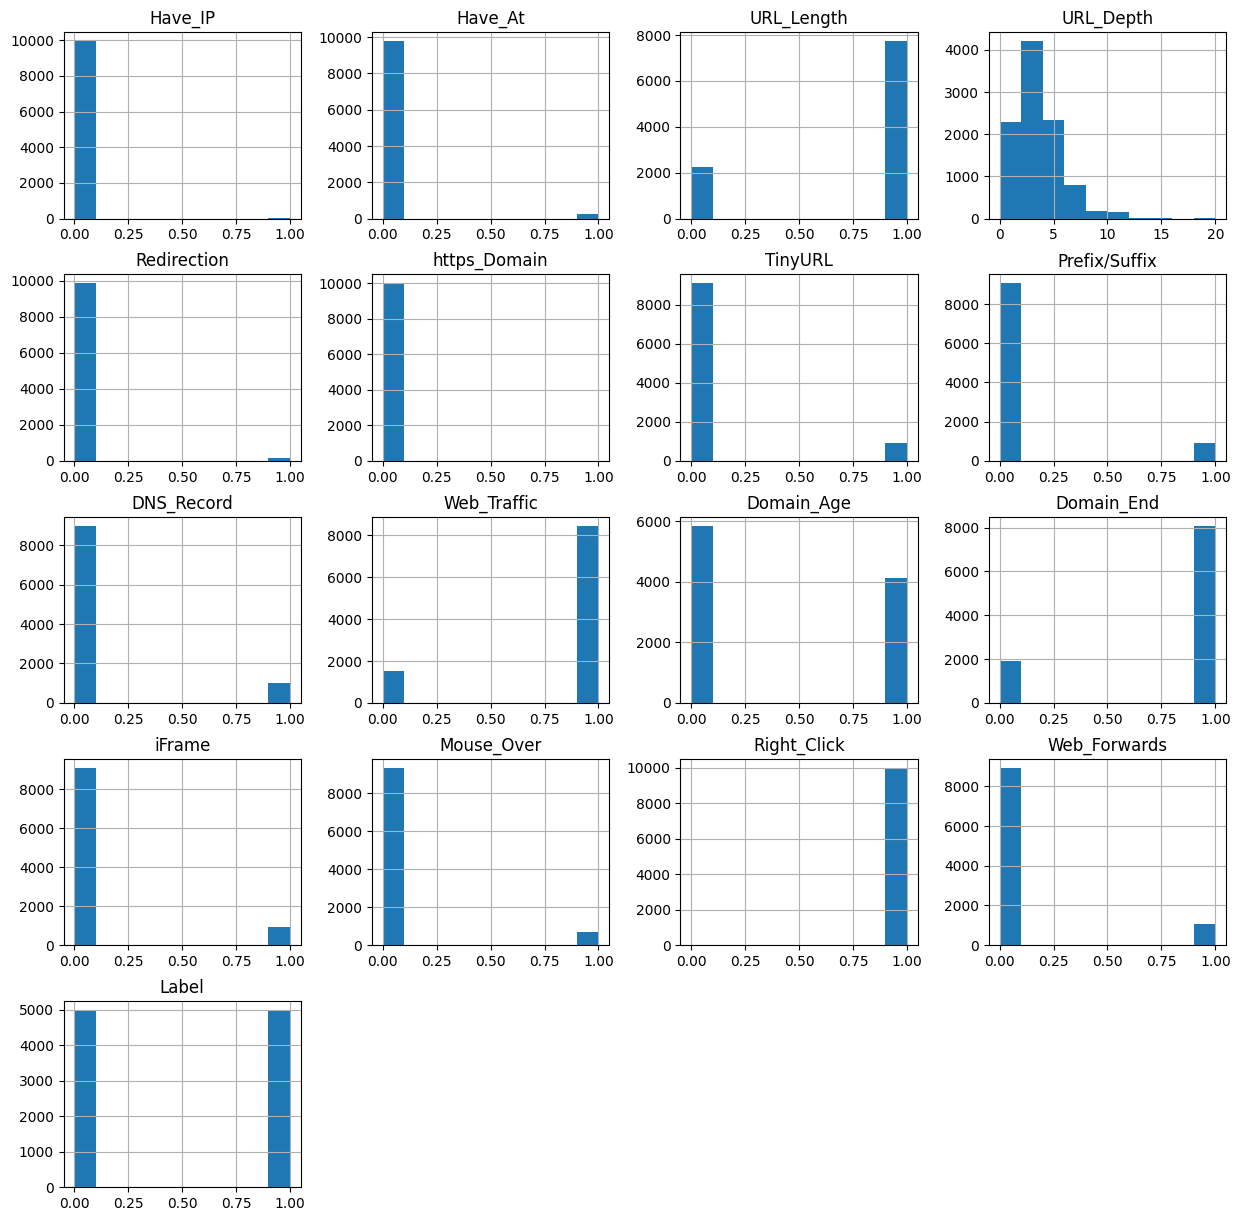

In [116]:
df.hist(figsize=(15,15))

In [117]:
df.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [118]:
data = df.drop(['Domain'], axis = 1).copy()
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [119]:
data.isna().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [120]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,1
1,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
2,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,1
3,0,0,0,3,0,0,0,0,0,1,0,1,1,1,1,1,1
4,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0


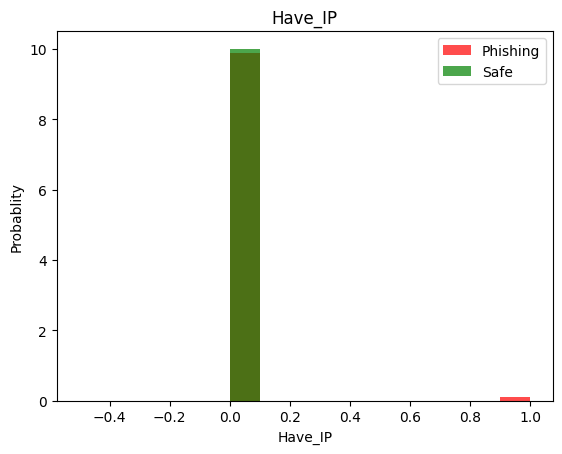

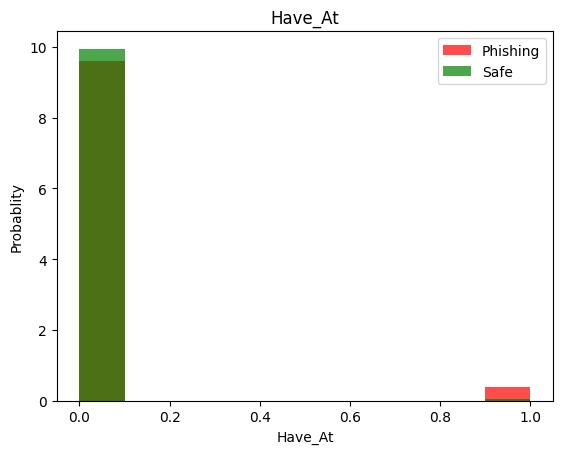

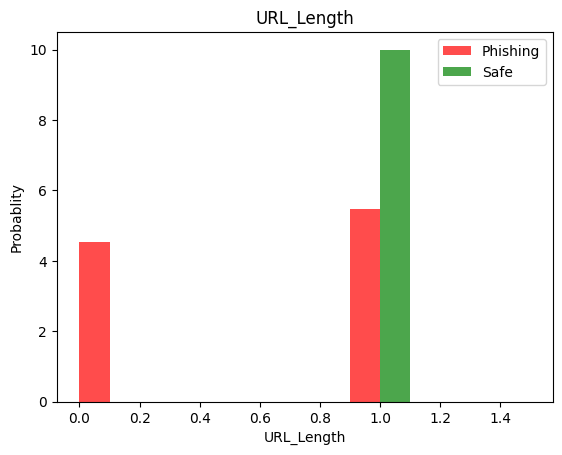

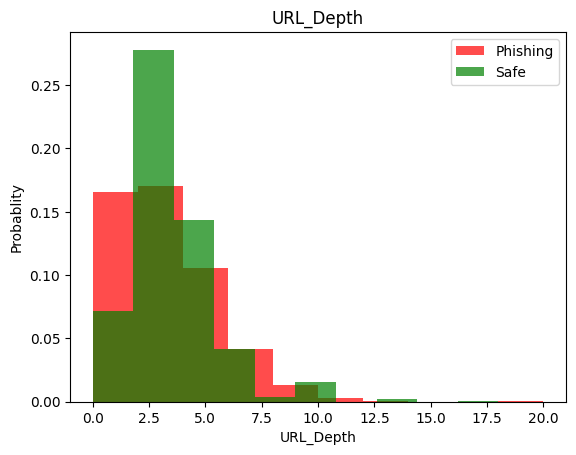

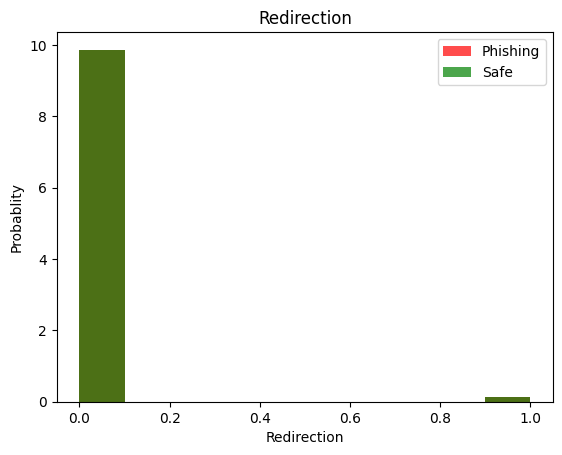

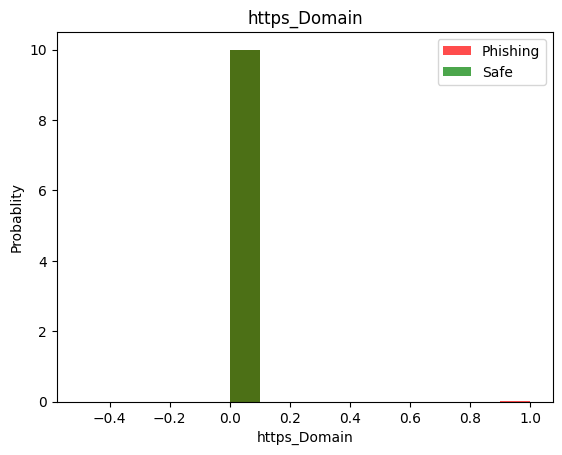

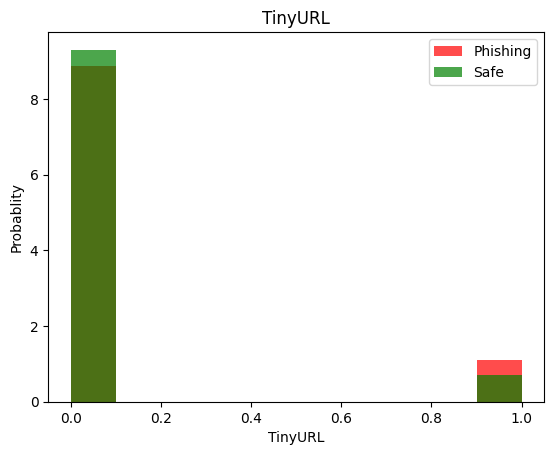

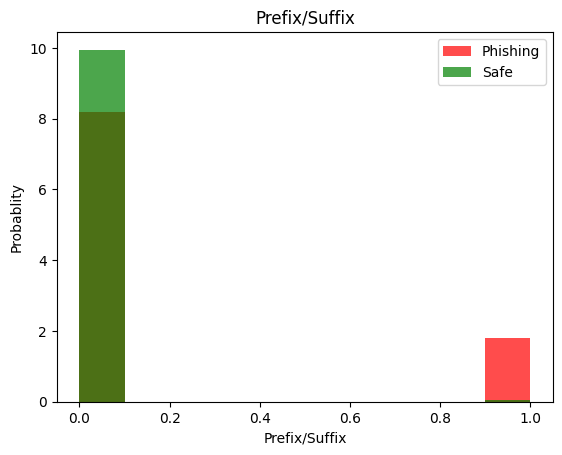

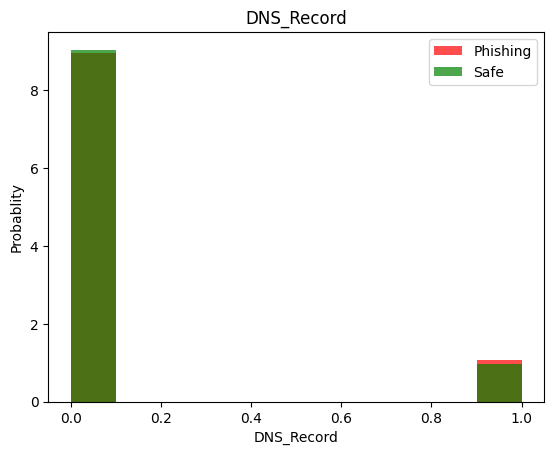

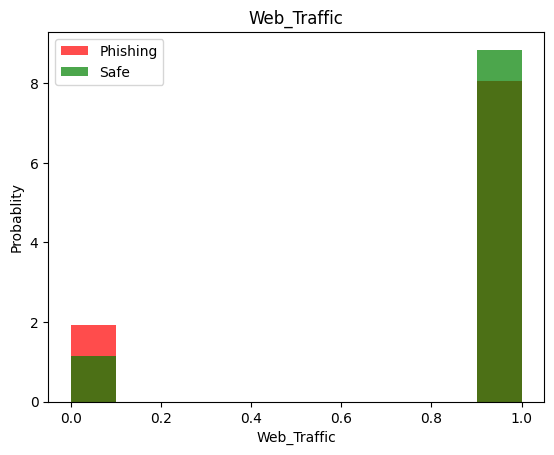

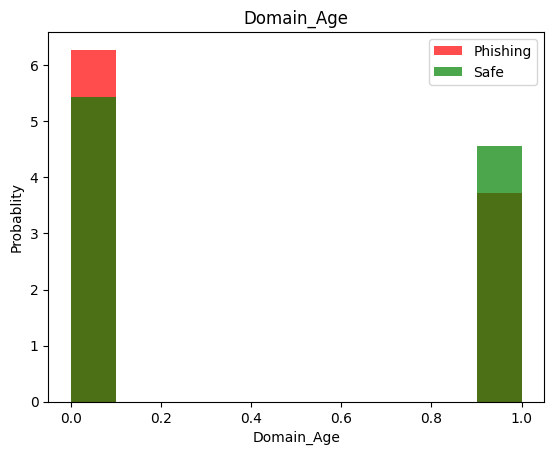

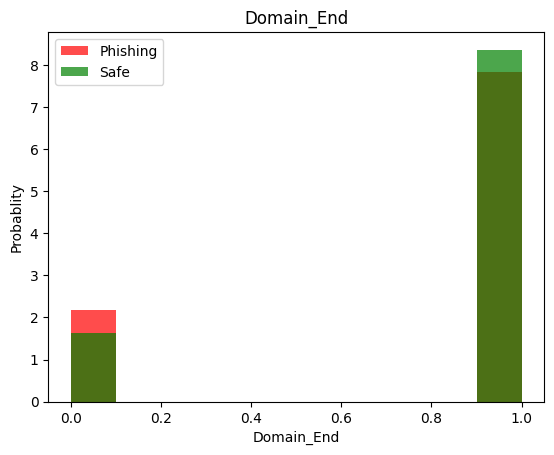

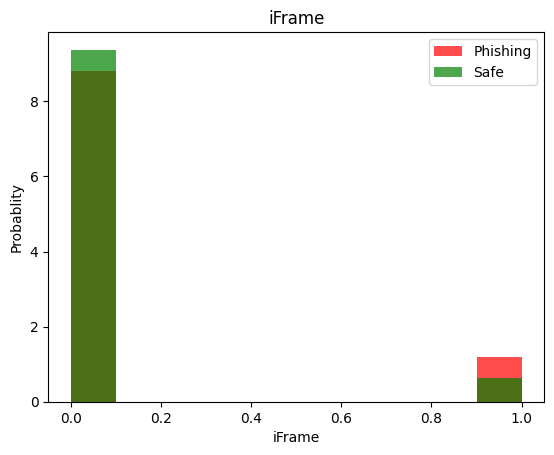

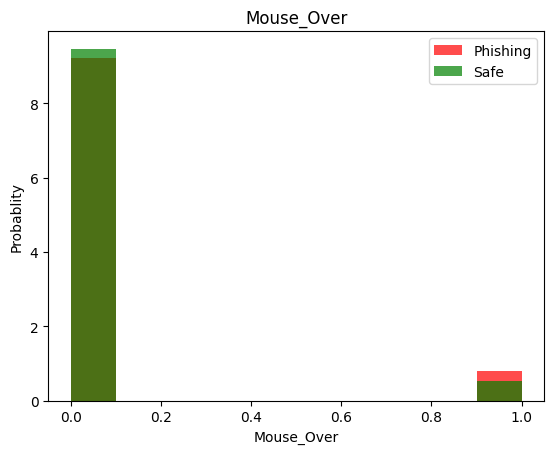

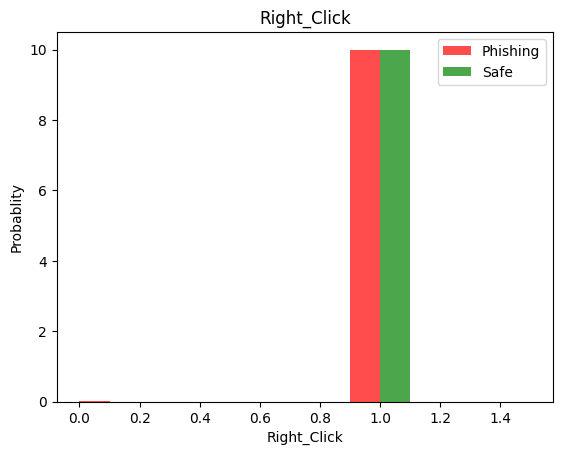

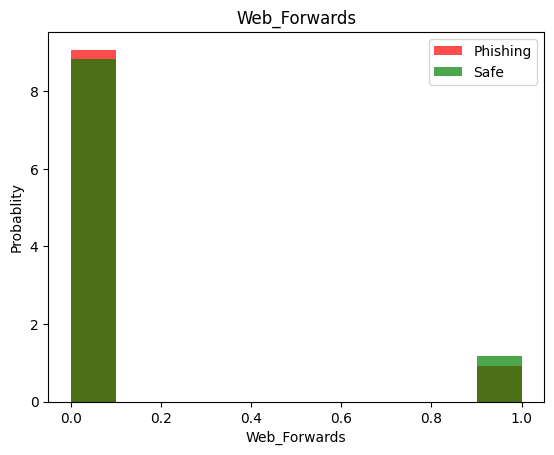

In [162]:
for column in data.columns[:-1]:
    plt.hist(data[data["Label"] == 1][column], color="red",
             alpha=0.7, label="Phishing", density=True)
    plt.hist(data[data["Label"] == 0][column], color="green",
             alpha=0.7, label="Safe", density=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel("Probablity")
    plt.legend()
    plt.show()

In [122]:
y = data['Label']
x = data.drop('Label',axis=1)
x.shape, y.shape

((10000, 16), (10000,))

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape

((8000, 16), (2000, 16))

In [124]:
Classifier_Model = []
acc_train = []
acc_test = []

In [125]:
def storeResults(model, a,b):
  Classifier_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# Decision Tree Classifier

In [126]:
tree = DecisionTreeClassifier(max_depth = 5)

tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [127]:
y_test_tree = tree.predict(x_test)
y_train_tree = tree.predict(x_train)

In [128]:
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.815
Decision Tree: Accuracy on test Data: 0.805


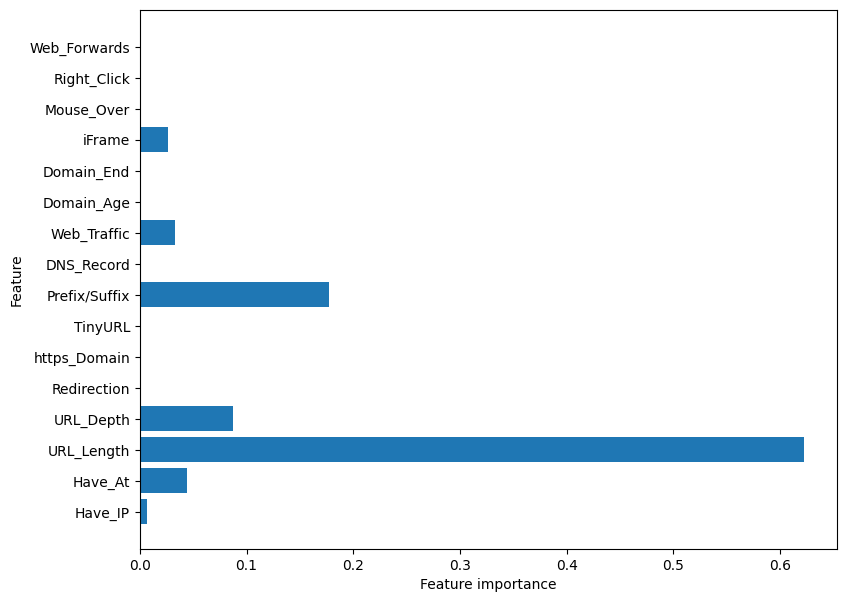

In [129]:
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [130]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# Random Forest Classifier

In [131]:
forest = RandomForestClassifier(max_depth=5)

forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [132]:
y_test_forest = forest.predict(x_test)
y_train_forest = forest.predict(x_train)

In [133]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.817
Random forest: Accuracy on test Data: 0.808


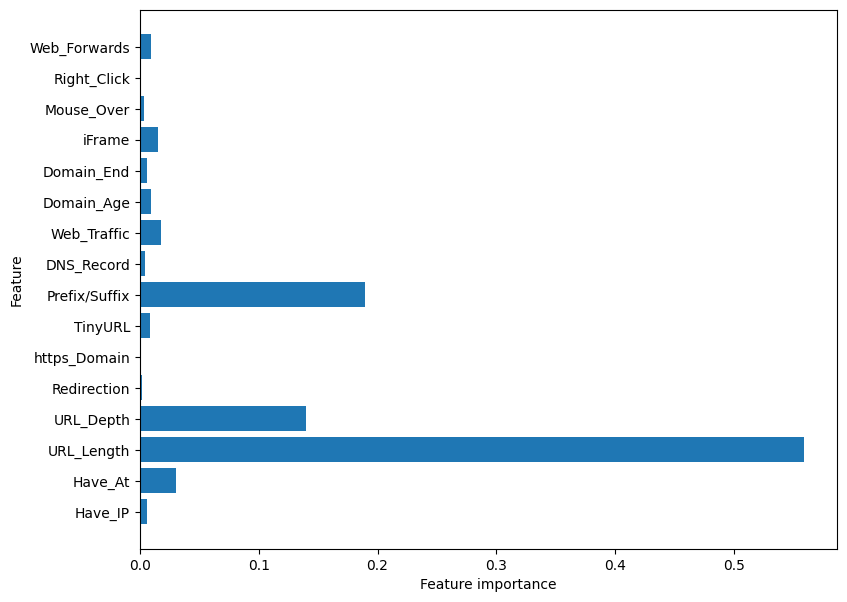

In [134]:
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [135]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# MLP Classifier

In [136]:
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

mlp.fit(x_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [137]:
y_test_mlp = mlp.predict(x_test)
y_train_mlp = mlp.predict(x_train)

In [138]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.865
Multilayer Perceptrons: Accuracy on test Data: 0.864


In [139]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)


# SVMs - Support Vecor Machines: SVC

In [140]:
svm = SVC(kernel='linear', C=1.0, random_state=12)

svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=12)

In [141]:
y_test_svm = svm.predict(x_test)
y_train_svm = svm.predict(x_train)

In [142]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.803
SVM : Accuracy on test Data: 0.797


In [143]:
storeResults('SVM', acc_train_svm, acc_test_svm)

# K Nearest Neighbors Classifier

In [144]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [145]:
y_test_knn = knn_model.predict(x_test)
y_train_knn = knn_model.predict(x_train)

In [146]:
acc_train_knn = accuracy_score(y_train,y_train_knn)
acc_test_knn = accuracy_score(y_test,y_test_knn)

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))

KNN: Accuracy on training Data: 0.854
KNN: Accuracy on test Data: 0.840


In [147]:
storeResults('KNN', acc_train_knn, acc_test_knn)

# Naive Bayes

In [148]:
nb_model = GaussianNB()

nb_model = nb_model.fit(x_train, y_train)

In [149]:
y_test_nb = nb_model.predict(x_test)
y_train_nb = nb_model.predict(x_train)

In [150]:
acc_train_nb = accuracy_score(y_train,y_train_nb)
acc_test_nb = accuracy_score(y_test,y_test_nb)

print("NB: Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("NB: Accuracy on test Data: {:.3f}".format(acc_test_nb))

NB: Accuracy on training Data: 0.793
NB: Accuracy on test Data: 0.788


In [151]:
storeResults('Naive Bayes', acc_train_nb, acc_test_nb)

# Logistic Regression

In [152]:
lg_model = LogisticRegression()

lg_model = lg_model.fit(x_train, y_train)

In [153]:
y_test_lg = lg_model.predict(x_test)
y_train_lg = lg_model.predict(x_train)

In [154]:
acc_train_lg = accuracy_score(y_train,y_train_lg)
acc_test_lg = accuracy_score(y_test,y_test_lg)

print("LG: Accuracy on training Data: {:.3f}".format(acc_train_lg))
print("LG: Accuracy on test Data: {:.3f}".format(acc_test_lg))

LG: Accuracy on training Data: 0.804
LG: Accuracy on test Data: 0.796


In [155]:
storeResults('Logistic Regression', acc_train_lg, acc_test_lg)

# Neural Networks

In [156]:
neuralNetwork = keras.Sequential([
    keras.layers.Dense(32, input_shape=(16,), activation = "sigmoid"), 
    keras.layers.Dense(32, activation = "sigmoid"),
    keras.layers.Dense(1, activation = "sigmoid")
])
neuralNetwork.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

Epoch 1/50
250/250 [==============================] - 4s 13ms/step - loss: 0.6735 - accuracy: 0.6170 - val_loss: 0.6397 - val_accuracy: 0.7170
Epoch 2/50
250/250 [==============================] - 3s 12ms/step - loss: 0.5815 - accuracy: 0.7496 - val_loss: 0.5118 - val_accuracy: 0.7870
Epoch 3/50
250/250 [==============================] - 2s 10ms/step - loss: 0.4670 - accuracy: 0.7993 - val_loss: 0.4342 - val_accuracy: 0.7955
Epoch 4/50
250/250 [==============================] - 2s 8ms/step - loss: 0.4253 - accuracy: 0.7999 - val_loss: 0.4194 - val_accuracy: 0.7995
Epoch 5/50
250/250 [==============================] - 2s 9ms/step - loss: 0.4150 - accuracy: 0.8034 - val_loss: 0.4096 - val_accuracy: 0.7975
Epoch 6/50
250/250 [==============================] - 2s 8ms/step - loss: 0.4107 - accuracy: 0.8049 - val_loss: 0.4058 - val_accuracy: 0.7970
Epoch 7/50
250/250 [==============================] - 2s 8ms/step - loss: 0.4065 - accuracy: 0.8060 - val_loss: 0.4033 - val_accuracy: 0.7970
Epo

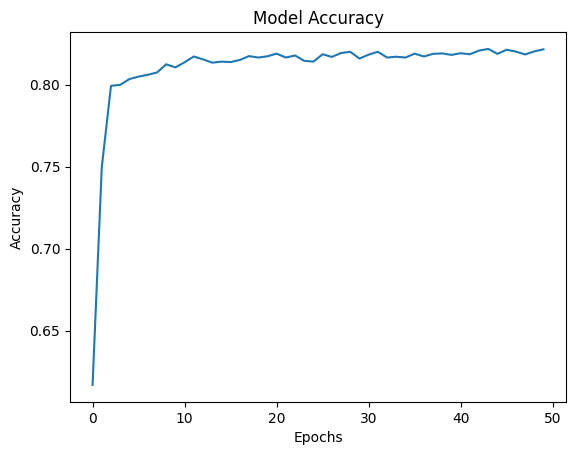

In [157]:
history = neuralNetwork.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()


In [158]:
loss, acc_train_NN = neuralNetwork.evaluate(x_train, y_train, verbose=0)
loss, acc_test_NN = neuralNetwork.evaluate(x_test, y_test, verbose=0)

print('Neural Network: Accuracy on training Data: {:.3f}'.format(acc_train_NN))
print('Neural Network: Accuracy on test Data: {:.3f}'.format(acc_test_NN))

Neural Network: Accuracy on training Data: 0.827
Neural Network: Accuracy on test Data: 0.819


In [159]:
storeResults('Neural Networks', acc_train_mlp, acc_test_mlp)

In [160]:
results = pd.DataFrame({ 'ML Model': Classifier_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.815,0.805
1,Random Forest,0.817,0.808
2,Multilayer Perceptrons,0.865,0.864
3,SVM,0.803,0.797
4,KNN,0.854,0.840
5,Naive Bayes,0.793,0.788
6,Logistic Regression,0.804,0.796
7,Neural Networks,0.865,0.864


In [161]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Multilayer Perceptrons,0.865,0.864
7,Neural Networks,0.865,0.864
4,KNN,0.854,0.840
1,Random Forest,0.817,0.808
0,Decision Tree,0.815,0.805
3,SVM,0.803,0.797
6,Logistic Regression,0.804,0.796
5,Naive Bayes,0.793,0.788
